<a href="https://colab.research.google.com/github/AhsanBilal157/Deep_learning_Assignments/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
**Also explore how to resize images in tensorflow and then resize all the images to a same size.**
This is a Multiclass Classification Problem.

WORKFLOW :
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction

Data :
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [25]:
from keras.preprocessing import image
p = Path('/content/gdrive/MyDrive/flowers')
dirs = p.glob('*')
image_data = []
labels = []
label_dict = {'dandelion':0,'daisy':1,'flowers':2,'sunflower':3,'tulip':4,'rose':5}
for folder_dir in dirs:
    label= str(folder_dir).split('/')[-1]
    cnt = 0
    print(label)
    for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path,target_size = (64,64))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])

rose
flowers
daisy
dandelion
sunflower
tulip


In [26]:
x = np.array(image_data)
y = np.array(labels)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4)


In [28]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1,image_size,image_size,3])
x_test = np.reshape(x_test,[-1,image_size,image_size,3])
x_train = x_train/255.0
x_test = x_test/255.0

In [29]:
y_train = to_categorical(y_train)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 256)       131328

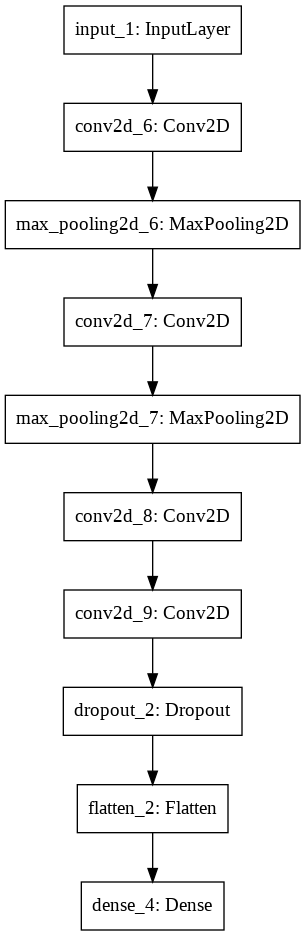

In [30]:
input_shape = (64,64,3)
inputs = Input(shape = input_shape)
x = inputs
x = Conv2D(32,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(64,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2))(x)


x = Conv2D(128,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = Conv2D(256,kernel_size = 2,activation = 'relu',strides = 1,padding = 'same')(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
outputs = Dense(6,activation = 'softmax')(x)
flower_classifier = Model(inputs,outputs)

flower_classifier.summary()
plot_model(flower_classifier)

In [31]:
flower_classifier.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [35]:
flower_classifier.fit(x_train,y_train,batch_size = 128,epochs = 30)


Epoch 1/30
21/21 [==============================] - 26s 1s/step - loss: 1.5891 - accuracy: 0.3040
Epoch 2/30
21/21 [==============================] - 25s 1s/step - loss: 1.1977 - accuracy: 0.4929
Epoch 3/30
21/21 [==============================] - 26s 1s/step - loss: 1.0504 - accuracy: 0.5732
Epoch 4/30
21/21 [==============================] - 25s 1s/step - loss: 0.9866 - accuracy: 0.6172
Epoch 5/30
21/21 [==============================] - 25s 1s/step - loss: 0.9683 - accuracy: 0.6131
Epoch 6/30
21/21 [==============================] - 25s 1s/step - loss: 0.8855 - accuracy: 0.6467
Epoch 7/30
21/21 [==============================] - 25s 1s/step - loss: 0.7987 - accuracy: 0.7074
Epoch 8/30
21/21 [==============================] - 25s 1s/step - loss: 0.7354 - accuracy: 0.7299
Epoch 9/30
21/21 [==============================] - 25s 1s/step - loss: 0.6696 - accuracy: 0.7532
Epoch 10/30
21/21 [==============================] - 25s 1s/step - loss: 0.5846 - accuracy: 0.7909
Epoch 11/30
21/21 [

In [37]:
test_case = flower_classifier.predict(x_test)
test_case

array([[6.8479384e-17, 2.1106098e-08, 2.3342139e-35, 1.3965973e-10,
        9.9963605e-01, 3.6387786e-04],
       [9.9128950e-01, 6.3457317e-03, 2.8593422e-25, 1.7171401e-03,
        7.8319799e-06, 6.3982891e-04],
       [3.2528564e-28, 8.6943333e-15, 1.0890519e-34, 9.2230904e-14,
        4.1975835e-03, 9.9580246e-01],
       ...,
       [9.8823840e-03, 6.4922667e-01, 2.4272537e-14, 3.3775720e-01,
        1.7038913e-03, 1.4297548e-03],
       [9.9999142e-01, 5.2379010e-06, 3.6541643e-22, 6.1539907e-09,
        1.6253872e-10, 3.3805563e-06],
       [8.3384685e-07, 8.5686886e-01, 6.8705714e-24, 5.4503330e-06,
        1.7315235e-04, 1.4295182e-01]], dtype=float32)

In [38]:
y_test_pred = np.argmax(test_case,axis = 1)

In [39]:
for i in range(50):
    print("actual",y_test[i],"predicted",y_test_pred[i])

actual 4 predicted 4
actual 0 predicted 0
actual 5 predicted 5
actual 5 predicted 4
actual 5 predicted 1
actual 1 predicted 5
actual 1 predicted 4
actual 3 predicted 3
actual 4 predicted 3
actual 1 predicted 0
actual 0 predicted 0
actual 4 predicted 4
actual 1 predicted 0
actual 4 predicted 4
actual 5 predicted 5
actual 1 predicted 1
actual 1 predicted 1
actual 3 predicted 3
actual 5 predicted 5
actual 5 predicted 5
actual 5 predicted 5
actual 4 predicted 1
actual 0 predicted 0
actual 5 predicted 5
actual 0 predicted 0
actual 0 predicted 0
actual 3 predicted 3
actual 4 predicted 4
actual 3 predicted 3
actual 0 predicted 0
actual 5 predicted 1
actual 3 predicted 3
actual 4 predicted 1
actual 1 predicted 0
actual 0 predicted 0
actual 4 predicted 4
actual 0 predicted 0
actual 1 predicted 4
actual 5 predicted 1
actual 1 predicted 1
actual 1 predicted 1
actual 4 predicted 4
actual 3 predicted 3
actual 0 predicted 0
actual 0 predicted 0
actual 0 predicted 0
actual 3 predicted 3
actual 3 pred